## Time Series Analysis

The following looks at time series analysis, in particular using Autoregressive (AR), Moving Averages (MA) and the combined ARIMA models. The modelling will be conducted using the R Forecasting library, which can be implemented in Python using the Python libray rpy2.

#### Stationary Series

Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately
stationary through the use of mathematical transformations. A time series which is stationary has a long running
mean and variance that is constant. The reason for stationality is that time series that are stationary are easy 
to predict, as the statitical properties will be the same in the future as they have been in the past.

A time series can be rendered stationary by computing the difference between each consecutive observation, equivalent
to differentiating. Logarithms can also help to stabalise the variance.

#### Autoregressive Models (AR)

Autoregressive models use data from previous time-points to predict the next time-point. They are essentially 
regression models where the predictors are previous timepoints. Autoregressive models perform well on data which
is autocorrelated. Autocorrelation is a measure of how correlated a variable is with itself at different points
in time. We also have Partial Autocorrelation, which is similar to the previous but without the linear
dependancy of intermdiate time lags.

#### Moving Average models (MA)

Unlike AR models, which use the past values to forecast, a moving average model uses the past forecast errors in
a regression like model. The degree of an MA model is the number of period's error terms on the current period's error.

#### ARIMA Models

ARIMA models combine the autoregressive models and moving average models along with an integrated differencing term
which ensures that the time series is stationary.

In [73]:
# Load libraries

%matplotlib inline
%load_ext rpy2.ipython

In [85]:
%%R

require("forecast")

#### Average Monthly Temperatures for Nottingham, 1920-1939

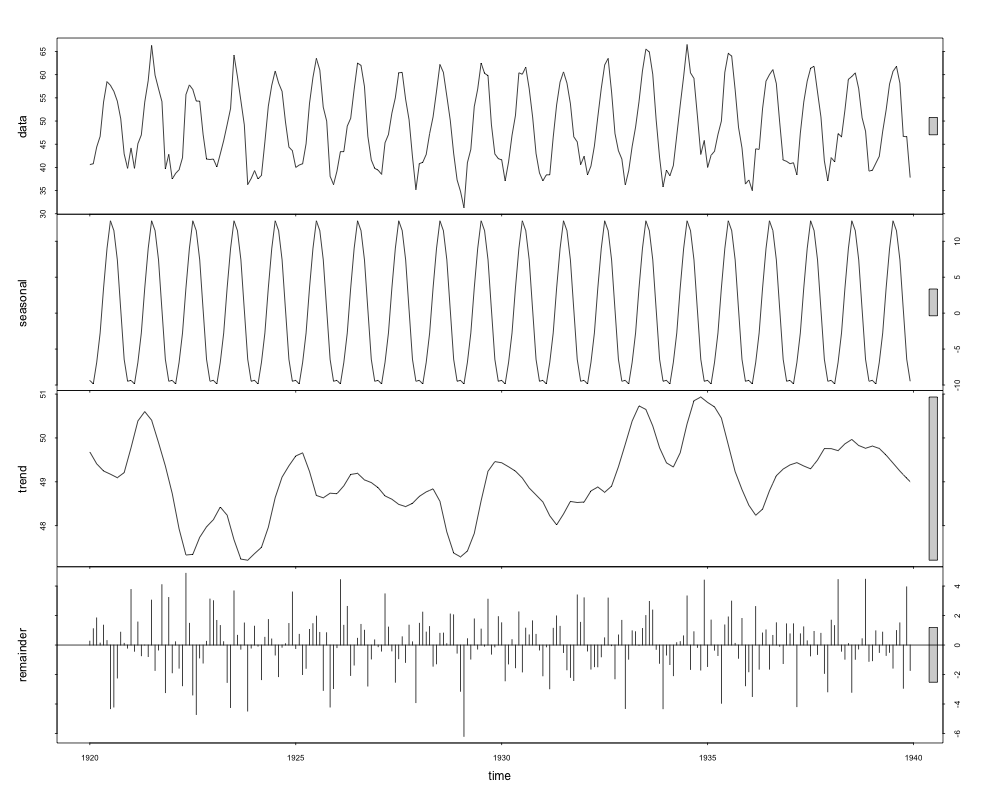

In [89]:
%%R -w 1000 -h 800 -u px 

# Decompose and plot temperature data into seasonal, trend and remainder

nottem.stl = stl(nottem, s.window = "periodic")
plot(nottem.stl)

In [ ]:
# As can be seen by the above plot, the data shows a strong seasonal component but no long-term trend and 
# no pattern in the remainder. The data looks to be stationary, with a constant mean and variance over a long
# time period. The data being stationary means that we do not have to differntiate 

#### Identifying AR abd MA models using the ACF and PACF

From both the ACF and PACF charts we can get an idea of the order of AR and MA models to use, by looking at 
how many spikes are outside the significance zone. 

The PACF is used to determine the order of the AR model i.e if the PACF "cuts off" at lag k, then this suggests 
that you should try fitting an autoregressive model of order k.

The ACF is used to determine if we need to consider an MA component and to what order. If the ACF of the series 
displays a sharp cutoff and/or the lag-1 autocorrelation is negative then an MA component should be included.
The lag at which the ACF cuts off is the indicated number of MA terms or the order.

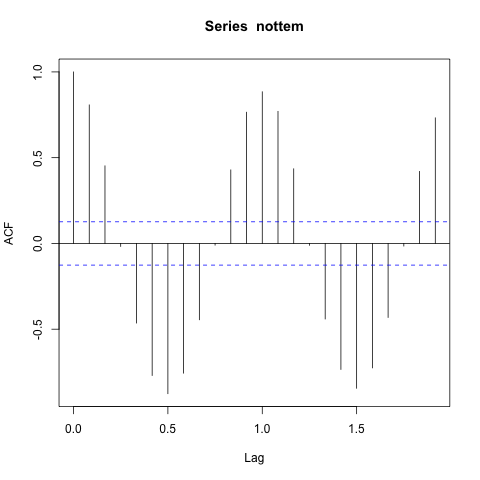

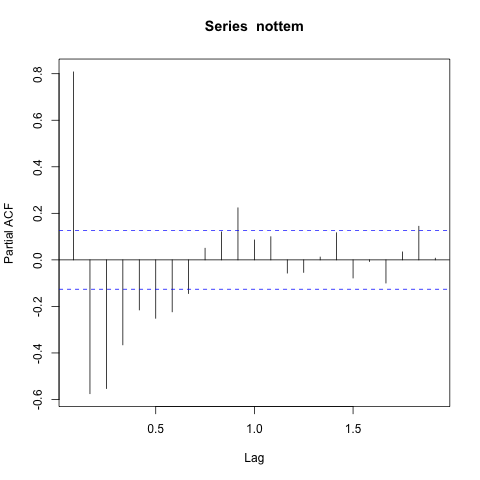

In [90]:
%%R
# Plot ACF
acf(nottem)
# Plot PACF
pacf(nottem)

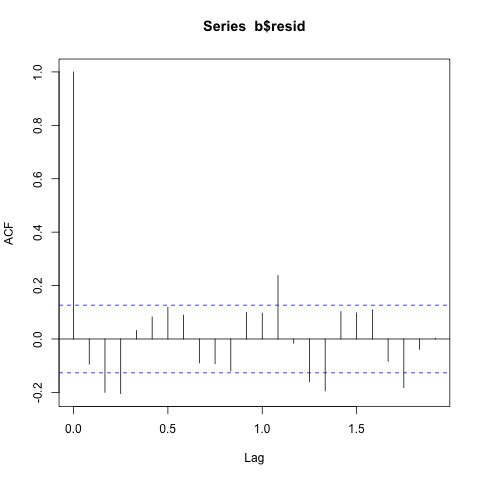

In [94]:
%%R
# The first four spike on the PACF were significantly larger than the significance level, which would indicate 
# using an AR(4) component in the model.
b <- arima(nottem, c(4, 0, 0))
acf(b$resid)

In [ ]:
# We see now that the residues of the model have improved, with the spikes only slightly larger than the
# significance level.

In [95]:
%%R
# Summary of the fitted function.
summary(b)


Call:
arima(x = nottem, order = c(4, 0, 0))

Coefficients:
         ar1     ar2      ar3      ar4  intercept
      0.7485  0.1687  -0.1696  -0.3959    49.0302
s.e.  0.0592  0.0764   0.0771   0.0599     0.3047

sigma^2 estimated as 9.235:  log likelihood = -609.17,  aic = 1230.35

Training set error measures:
                       ME    RMSE      MAE        MPE     MAPE      MASE
Training set -0.008406805 3.03896 2.418576 -0.4217481 5.153852 0.5598988
                    ACF1
Training set -0.09422379


#### Adding seasonal component to model

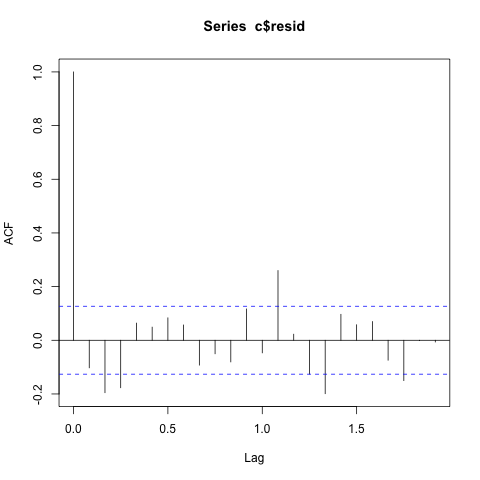

In [98]:
%%R

# Adding in the seaonal component to the model
c <- arima(nottem, c(4,0,0), seasonal = list(order = c(1,0,0), 12)) # Seasonal effect which repeates every 12 months
acf(c$resid)

In [99]:
%%R
# Summary
summary(c)


Call:
arima(x = nottem, order = c(4, 0, 0), seasonal = list(order = c(1, 0, 0), 12))

Coefficients:
         ar1     ar2      ar3      ar4    sar1  intercept
      0.7088  0.1990  -0.1671  -0.4027  0.1272    49.0325
s.e.  0.0636  0.0761   0.0751   0.0596  0.0737     0.3370

sigma^2 estimated as 9.113:  log likelihood = -607.64,  aic = 1229.29

Training set error measures:
                       ME     RMSE      MAE      MPE     MAPE      MASE
Training set -0.006860302 3.018762 2.403041 -0.44014 5.123033 0.5563025
                   ACF1
Training set -0.1026046


In [100]:
# Adding in the seasonal components have improved the residues and we now have a smaller training error when compared
# with the previous summary.

#### Predicting with ARIMA model

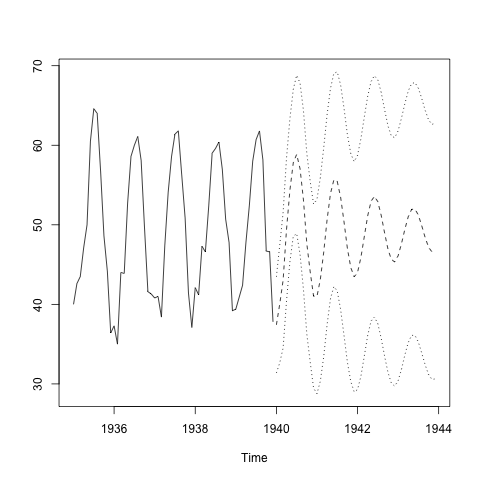

In [104]:
%%R
# Predict and plot the predictions, including the confidence levels (two standard deviations)

b <- arima(nottem, c(4,0,0), seasonal = list(order = c(1,0,0), 12))
pr2 <- predict(b, n.ahead = 48) # Predict 48 time periods ahead
ts.plot(window(nottem, start=1935), pr2$pred, pr2$pred + 2*pr2$se ,pr2$pred - 2*pr2$se, lty = c(1,2,3,3))

In [ ]:
# As can be seen by the above plot, predictions with a large time period eventually approach the mean of the 
# original time series.

#### AutoARIMA

In [ ]:
# Instead of deciding on the components and order of the models used within ARIMA, we can instead use AutoARIMA
# which automatically calculates the optimal model orders.

In [108]:
%%R
model2 <- auto.arima(nottem, approximation = FALSE, trace = FALSE)
model2

Series: nottem 
ARIMA(4,0,1)(1,0,0)[12] with non-zero mean 

Coefficients:
         ar1      ar2      ar3      ar4      ma1    sar1  intercept
      1.1600  -0.2307  -0.2043  -0.1814  -0.6408  0.1201    49.0304
s.e.  0.0844   0.1098   0.1007   0.0755   0.0567  0.0702     0.1635

sigma^2 estimated as 8.151:  log likelihood=-591.1
AIC=1198.2   AICc=1198.82   BIC=1226.05
